In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
# Read the file

df=pd.read_csv('/content/drive/MyDrive/Colab Notebook/TrainingDataset[98].csv')

In [4]:
df.shape

(751, 558)

In [5]:
df.columns

Index(['Outcome_M1', 'Outcome_M2', 'Outcome_M3', 'Outcome_M4', 'Outcome_M5',
       'Outcome_M6', 'Outcome_M7', 'Outcome_M8', 'Outcome_M9', 'Outcome_M10',
       ...
       'Cat_505', 'Cat_506', 'Cat_507', 'Cat_508', 'Cat_509', 'Cat_510',
       'Cat_511', 'Cat_512', 'Cat_513', 'Cat_514'],
      dtype='object', length=558)

In [6]:
# To read additional columns

df.columns[10:35]

Index(['Outcome_M11', 'Outcome_M12', 'Cat_1', 'Date_1', 'Quan_1', 'Quan_2',
       'Quan_3', 'Quan_4', 'Date_2', 'Quan_5', 'Quan_6', 'Quan_7', 'Quan_8',
       'Quan_9', 'Quan_10', 'Quan_11', 'Quan_12', 'Quan_13', 'Quan_14',
       'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'],
      dtype='object')

### Data Preprocessing

In [7]:
# Assign target labels to variable month

month=df.columns[0:12].tolist()

In [8]:
# Add a coloumn 'year' which is a sum of all monthly sales

df['year']=df[month].sum(axis=1)
df[['year']]

,year
0,33500.0
1,32000.0
2,43500.0
3,81000.0
4,24500.0
...,...
746,105500.0
747,13500.0
748,24000.0
749,26500.0


In [9]:
# Drop unnecessary features like Dates

df.drop(['Date_1', 'Date_2'], axis=1, inplace=True)
df.head()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,...,Cat_506,Cat_507,Cat_508,Cat_509,Cat_510,Cat_511,Cat_512,Cat_513,Cat_514,year
0,10000,3000.0,8000.0,3000.0,3000.0,2000.0,2000.0,500.0,500.0,500.0,...,0,0,1,0,1,0,0,0,1,33500.0
1,8000,8000.0,2000.0,3000.0,2000.0,500.0,2000.0,2000.0,3000.0,500.0,...,0,0,1,0,0,0,0,0,1,32000.0
2,5000,15000.0,8000.0,3000.0,3000.0,2000.0,2000.0,2000.0,2000.0,500.0,...,0,0,1,0,0,0,0,0,1,43500.0
3,35000,8000.0,8000.0,5000.0,5000.0,3000.0,2000.0,3000.0,6000.0,2000.0,...,0,0,1,0,1,0,0,0,1,81000.0
4,16000,2000.0,2000.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,0,0,1,0,1,0,0,0,1,24500.0


In [10]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Columns: 557 entries, Outcome_M1 to year
dtypes: float64(37), int64(520)
memory usage: 3.2 MB


In [11]:
df.describe()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,...,Cat_506,Cat_507,Cat_508,Cat_509,Cat_510,Cat_511,Cat_512,Cat_513,Cat_514,year
count,751.000000,748.000000,746.000000,746.000000,727.000000,705.000000,694.000000,687.000000,677.000000,656.000000,...,751.0,751.0,751.0,751.0,751.000000,751.000000,751.000000,751.000000,751.0,7.510000e+02
mean,20620.505992,10837.566845,5194.369973,3494.638070,2852.132050,2018.439716,1751.440922,1492.721980,1411.373708,1320.884146,...,0.0,0.0,1.0,0.0,0.302264,0.029294,0.034621,0.010652,1.0,5.204660e+04
std,54893.895765,26447.885519,10151.524258,6778.269518,6605.350344,2927.572752,1996.524238,1959.116988,2030.529714,1655.987926,...,0.0,0.0,0.0,0.0,0.459545,0.240432,0.182938,0.145670,0.0,1.020924e+05
min,2000.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,2.000000e+03
25%,2000.000000,2000.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1.150000e+04
50%,5000.000000,3000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,500.000000,500.000000,500.000000,...,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,2.150000e+04
75%,16000.000000,8000.000000,5000.000000,3000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.000000,1.0,4.925000e+04
max,795000.000000,315000.000000,108000.000000,74000.000000,81000.000000,27000.000000,21000.000000,21000.000000,23000.000000,23000.000000,...,0.0,0.0,1.0,0.0,1.000000,2.000000,1.000000,2.000000,1.0,1.363000e+06


In [12]:
# Sum of missing values

df.isnull().sum()

Outcome_M1     0
Outcome_M2     3
Outcome_M3     5
Outcome_M4     5
Outcome_M5    24
              ..
Cat_511        0
Cat_512        0
Cat_513        0
Cat_514        0
year           0
Length: 557, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


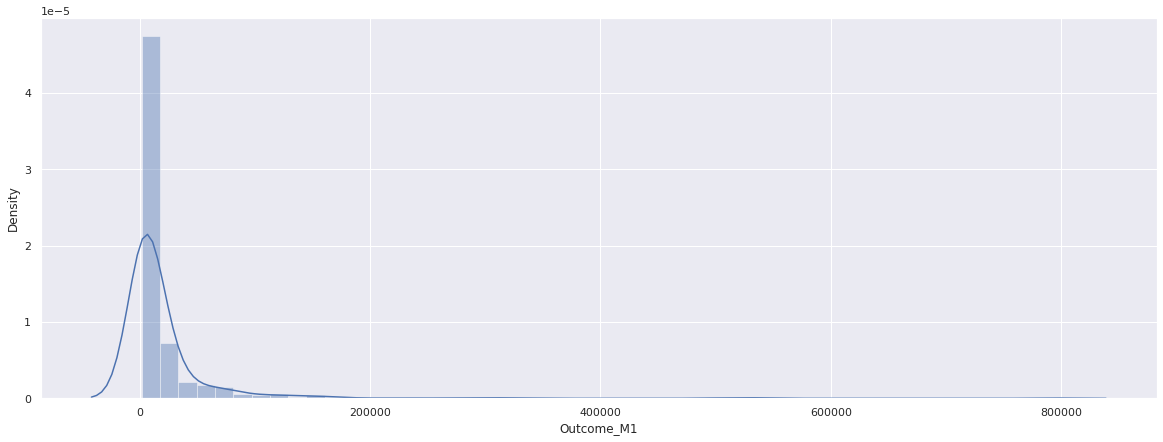

In [14]:
# Distrubution plot to figure out the method for missing value treatment

import seaborn as sns
sns.set(rc={'figure.figsize':(20,7)})
sns.distplot(df.Outcome_M1)

Since the distribution plot is skewed, we can use either mode or median to replace missing values.

In [15]:
# Replacing missing values with mode of the coloumn

df[df.columns]=df[df.columns].fillna(df.mode().iloc[0])

### EDA

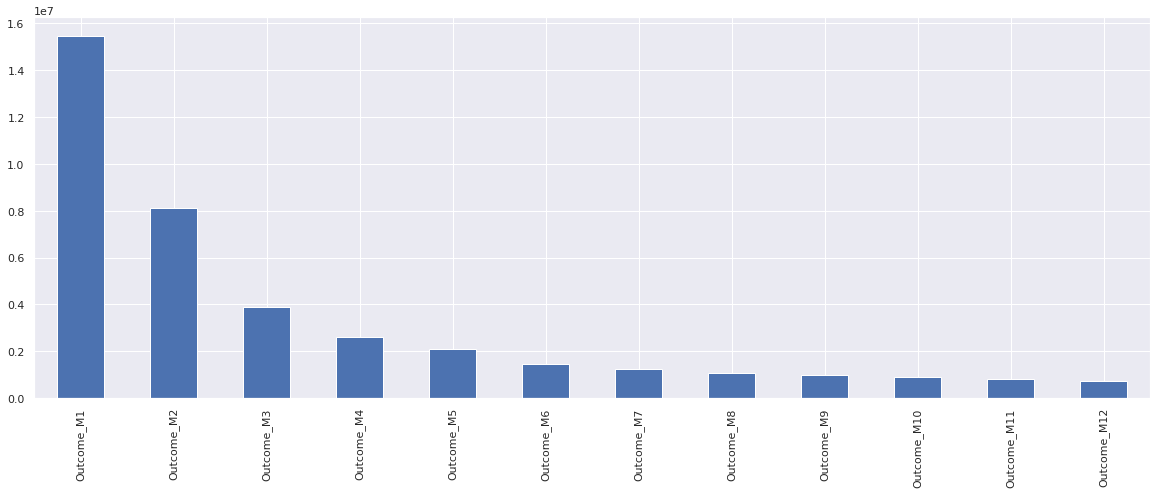

In [16]:
# Bar graph for target variables' distribution

month=df.columns[0:12].tolist()
fig, ax = plt.subplots(figsize=(20,7))
df[month].sum(axis = 0, skipna = True).plot.bar()

The overall monthly sales kept decreasing over time

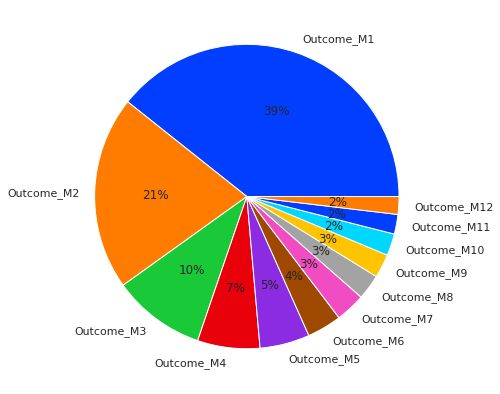

In [32]:
# Pie chart for monthly sales

data = df.iloc[:,0:12].sum()
keys = month
palette_color = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

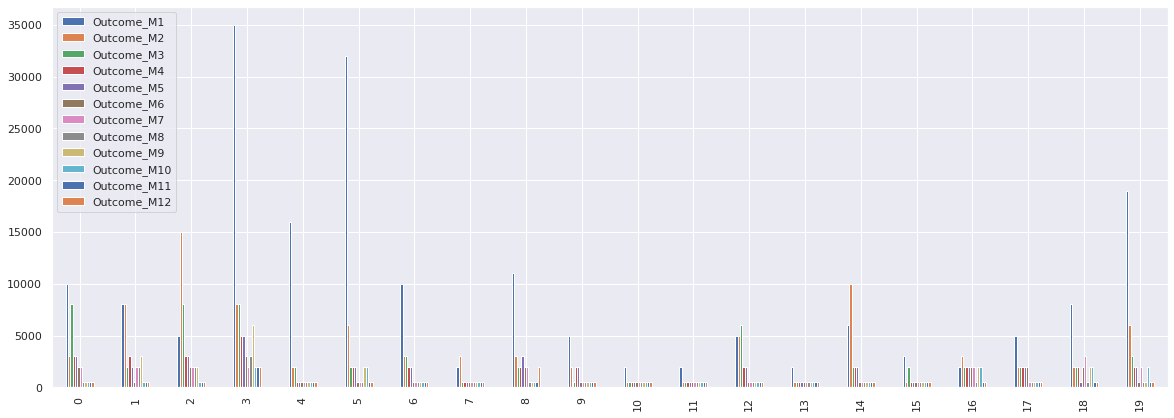

In [17]:
# Bar graph to compre monthly sales of first 20 rows

sns.set(rc={'figure.figsize':(20,7)})
df.iloc[0:20,0:12].plot.bar()
plt.show()

The sales for first 20 products has been highest for the first month except for certain products with hbighest sales in second month.

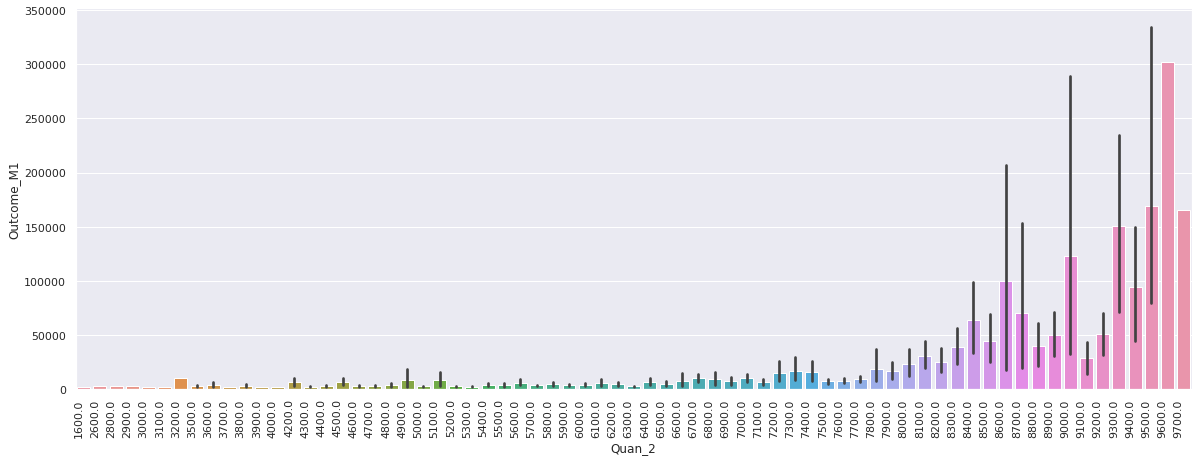

In [18]:
# Direct relation between quantity and first month's sales

fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
d=sns.barplot(x = "Quan_2", y = "Outcome_M1", ax=ax, data=df)
d.set_xticklabels(d.get_xticklabels(), rotation=90, ha="right")
plt.show()

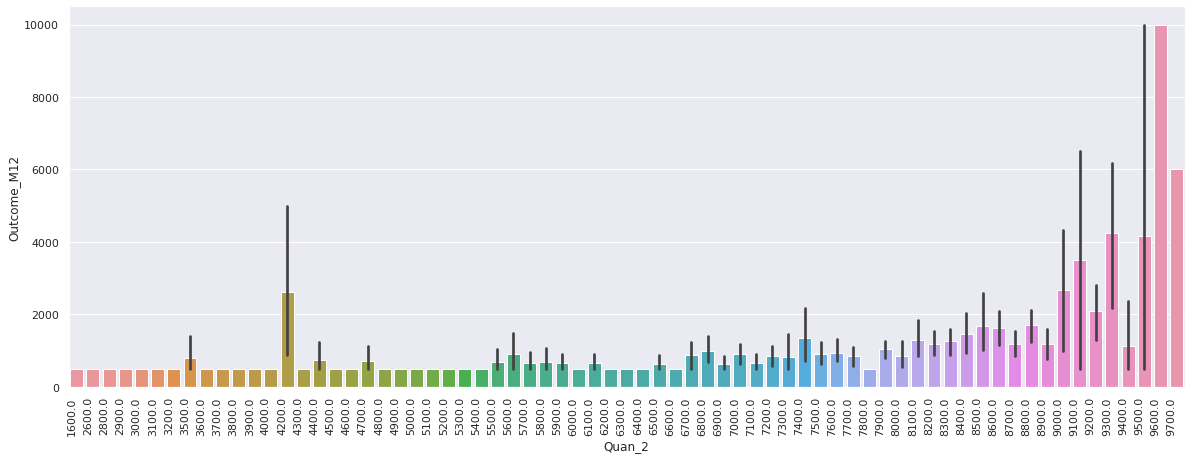

In [19]:
# Direct relation between quantity and last month's sales

fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
d=sns.barplot(x = "Quan_2", y = "Outcome_M12", ax=ax, data=df)
d.set_xticklabels(d.get_xticklabels(), rotation=90, ha="right")
plt.show()

Increasing quantity had a direct impact on monthly sales.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

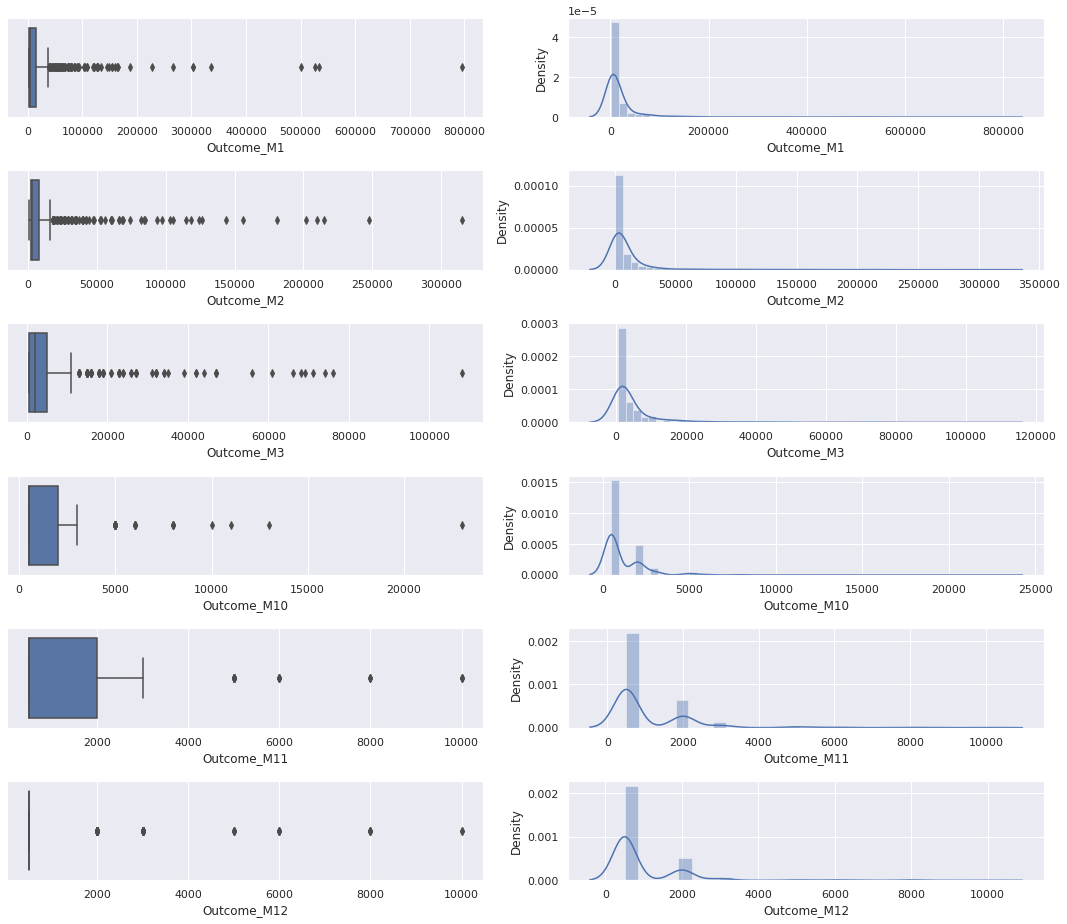

In [20]:
# Boxplots and Distribution plots of various months

fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df["Outcome_M1"], ax = ax[0,0])
sns.distplot(df['Outcome_M1'], ax = ax[0,1])
sns.boxplot(x= df["Outcome_M2"], ax = ax[1,0])
sns.distplot(df['Outcome_M2'], ax = ax[1,1])
sns.boxplot(x= df["Outcome_M3"], ax = ax[2,0])
sns.distplot(df['Outcome_M3'], ax = ax[2,1])
sns.boxplot(x= df["Outcome_M10"], ax = ax[3,0])
sns.distplot(df['Outcome_M10'], ax = ax[3,1])
sns.boxplot(x= df["Outcome_M11"], ax = ax[4,0])
sns.distplot(df['Outcome_M11'], ax = ax[4,1])
sns.boxplot(x= df["Outcome_M12"], ax = ax[5,0])
sns.distplot(df['Outcome_M12'], ax = ax[5,1])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


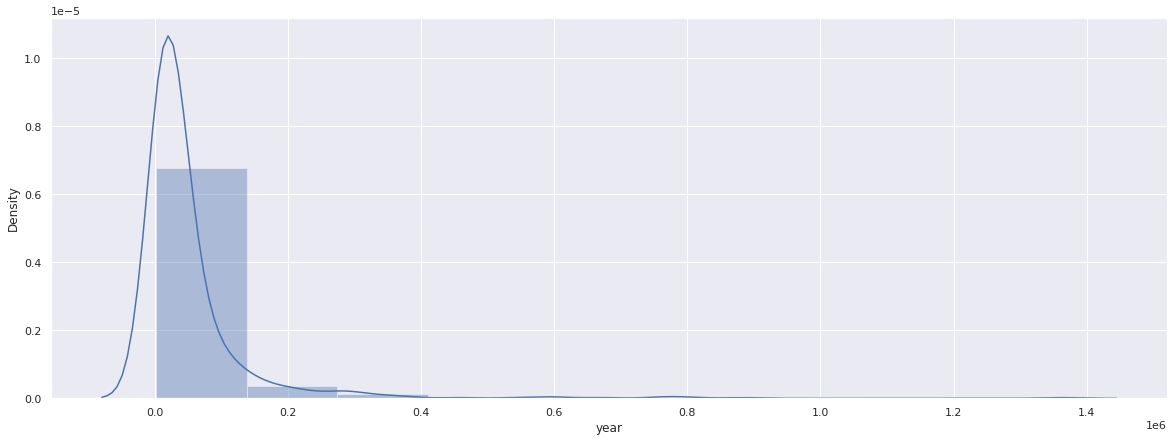

In [23]:
# Distribution plot for sales over entire year

x = df['year']
sns.distplot(x, bins=10)
plt.show()

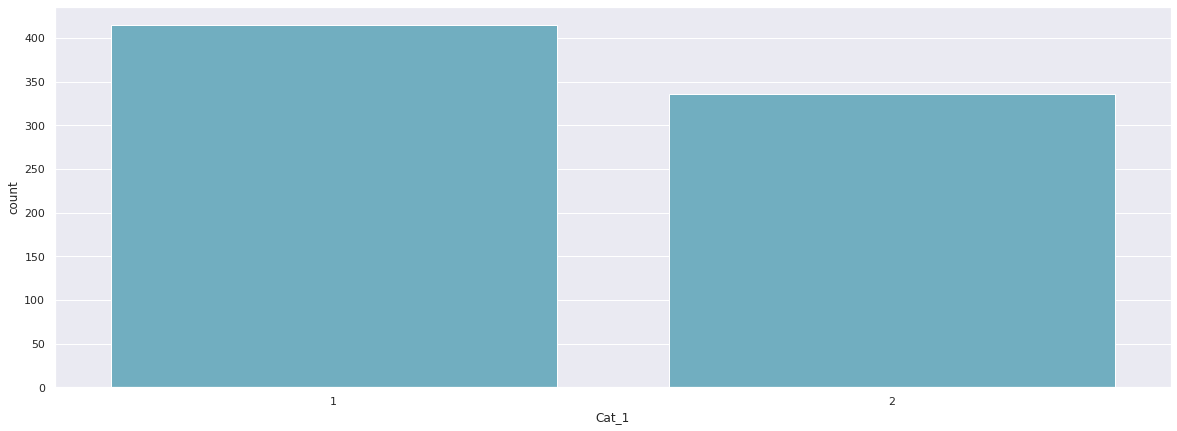

In [37]:
# Is there a relation between features and yearly sales?
# Countplot

sns.countplot(x="Cat_1", data=df, color="c")
plt.show()

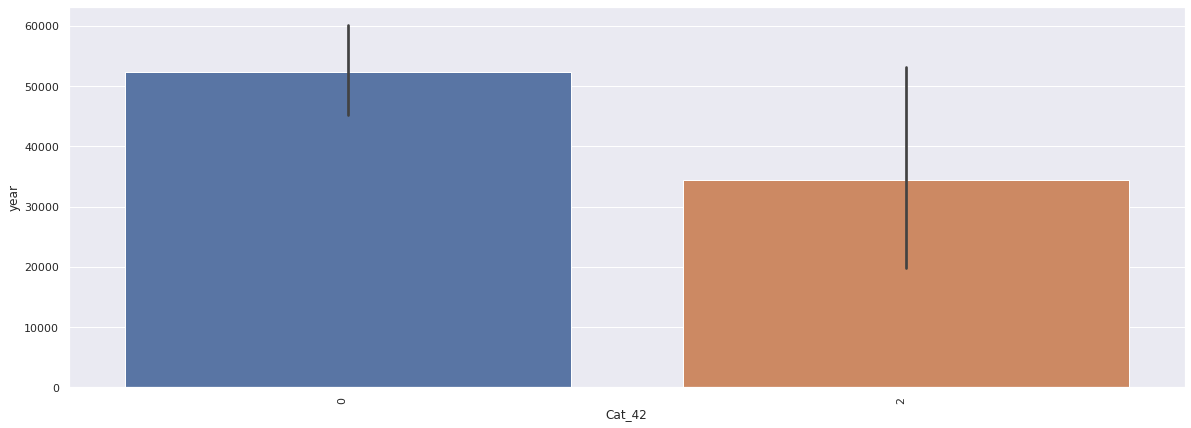

In [38]:
# Bargraph

fig, ax = plt.subplots(figsize=fig_dims)
d=sns.barplot(x = "Cat_42", y = "year", ax=ax, data=df)
d.set_xticklabels(d.get_xticklabels(), rotation=90, ha="right")
plt.show()

Since different products will have different features for which the sales would increase, there can be seen no linear dependency of sales on the features.

### Building Models using GridSearchCV for choosing best hyperparameters

In [42]:
# Separate target variables from rest of the dataset

y = df[df.columns[0:12]]
X=df[df.columns[12:]]

In [43]:
X

,Cat_1,Quan_1,Quan_2,Quan_3,Quan_4,Quan_5,Quan_6,Quan_7,Quan_8,Quan_9,...,Cat_506,Cat_507,Cat_508,Cat_509,Cat_510,Cat_511,Cat_512,Cat_513,Cat_514,year
0,2,918600,8300.0,76.0,538046.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,1,0,0,0,1,33500.0
1,2,981000,7600.0,50.0,557614.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,32000.0
2,2,31600,8000.0,66.0,1119115.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,43500.0
3,2,685300,7900.0,101.0,1416697.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,1,0,0,0,1,81000.0
4,1,2657500,7600.0,81.0,58666.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,1,0,0,0,1,24500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2,2613200,8500.0,122.0,1178524.0,124.0,27.0,34.0,124.0,124.0,...,0,0,1,0,0,2,0,0,1,105500.0
747,2,685300,5400.0,37.0,331563.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,13500.0
748,1,1684000,5400.0,56.0,564834.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,24000.0
749,2,1210500,7400.0,60.0,94900.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,26500.0


In [44]:
# Reduce 558 features to 15 most significant ones

X,y=make_regression(n_samples=751,n_informative=15, n_features=558, n_targets=12)
X

In [45]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 0)

In [58]:
# Random Forest Regressor

parameters = {
              'n_estimators': [100, 150, 200, 250, 300],
              'max_depth': [1,2,3,4],
              }
regr = RandomForestRegressor(random_state=0)
clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)


34695.98279710251

In [56]:
# Decision Tree Regressor

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
regressor = DecisionTreeRegressor(random_state = 0)
clf = GridSearchCV(regressor, param_grid)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Without GridSearchCV, MSE = 68007.84658553872


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

41754.858267622

In [57]:
# MSE for Decision Tree Regressor
mean_squared_error(y_test, y_pred)

41754.858267622

In [53]:
# LinearRegression

parameters = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False]
              }
model=LinearRegression()
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

2.1378111487264906e-24


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [54]:
# MSE for Linear Regression
mean_squared_error(y_test, y_pred) 

2.1378111487264906e-24


In [ ]:
# Polynomial Regression of degree = 2 without GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=2
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)
y_pred = polyreg.predict(X_test)
print(mean_squared_error(y_test, y_pred)) 

54506.825859397235


### Conclusion : Linear Regression gave the best results for this dataset.